## Real-time Insights from Twitter Data

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [16]:

# Load WW_trends and US_trends data into the the given variables respectively
WW_trends = json.loads(open('datasets/WWTrends.json').read())
US_trends = json.loads(open('datasets/USTrends.json').read())

# Inspecting data by printing out WW_trends 
print("WW trends:")
print(json.dumps(WW_trends, indent=1)[0:1000])


WW trends:
[
 {
  "trends": [
   {
    "name": "#BeratKandili",
    "url": "http://twitter.com/search?q=%23BeratKandili",
    "promoted_content": null,
    "query": "%23BeratKandili",
    "tweet_volume": 46373
   },
   {
    "name": "#GoodFriday",
    "url": "http://twitter.com/search?q=%23GoodFriday",
    "promoted_content": null,
    "query": "%23GoodFriday",
    "tweet_volume": 81891
   },
   {
    "name": "#WeLoveTheEarth",
    "url": "http://twitter.com/search?q=%23WeLoveTheEarth",
    "promoted_content": null,
    "query": "%23WeLoveTheEarth",
    "tweet_volume": 159698
   },
   {
    "name": "#195TLdenTTVerilir",
    "url": "http://twitter.com/search?q=%23195TLdenTTVerilir",
    "promoted_content": null,
    "query": "%23195TLdenTTVerilir",
    "tweet_volume": null
   },
   {
    "name": "#AFLNorthDons",
    "url": "http://twitter.com/search?q=%23AFLNorthDons",
    "promoted_content": null,
    "query": "%23AFLNorthDons",
    "tweet_volume": null
   },
   {
    "name": "Shiv Sen

In [8]:
# Extracting all the WW trend names from WW_trends
world_trends = set([trend['name'] for trend in WW_trends[0]['trends']])

# Extracting all the US trend names from US_trends
us_trends = set([trend['name'] for trend in US_trends[0]['trends'] ]) 

# Getting the intersection of the two sets of trends
common_trends = world_trends.intersection(us_trends)

# Inspecting the data
print (len(common_trends), "common trends:", common_trends)

11 common trends: {'Lil Dicky', '#DinahJane1', '#WeLoveTheEarth', '#ConCalmaRemix', 'Derrick White', 'Lyra McKee', '#NRLBulldogsSouths', '#DragRace', '#AFLNorthDons', '#BLACKPINKxCorden', 'Derry'}


In [9]:
#Finding the trends with top 10 volume in the world 
world_trends_df = pd.DataFrame(WW_trends[0]['trends']).fillna(0)
world_trends_df.sort_values(by=['tweet_volume'], ascending=False, inplace=True, ignore_index=True)
top_10_trends = world_trends_df[['name', 'tweet_volume']][:10]
top_10_trends

,name,tweet_volume
0,#BLACKPINKxCorden,253605.0
1,#WeLoveTheEarth,159698.0
2,#HanumanJayanti,83138.0
3,#GoodFriday,81891.0
4,#يوم_الجمعه,80799.0
5,#KpuJanganCurang,75384.0
6,十二国記,46803.0
7,#BeratKandili,46373.0
8,Lil Dicky,42461.0
9,#ConCalmaRemix,37846.0


In [10]:
# Finding the proportion of text in tweets and retweets including 'love' of the whole dataset
tweets_earth = json.loads(open('datasets/WeLoveTheEarth.json').read())

def flatten_tweets(tweets_json): 
    """ Flattens out tweet dictionaries so relevant JSON
    is in a top-level dictionary."""
    tweets_list = []
    for tweet in tweets_json: 
        tweet['user_screen_name'] = tweet['user']['screen_name']
        if 'retweeted_status' in tweet: 
            tweet['retweeted_status_user_screen_name'] = tweet['retweeted_status']['user']['screen_name']
            tweet['retweeted_status_text'] = tweet['retweeted_status']['text']
        tweets_list.append(tweet)
    return tweets_list  

tweets_earth_list = flatten_tweets(tweets_earth)
tweets_df = pd.DataFrame(tweets_earth_list)

def check_word_in_tweet(word, data): 
    """Check if a word is in Twitter dataset's text. 
       Check text and reweeted text"""  
    contains_column = word['text'].str.contains(data, case=False)
    contains_column |= word['retweeted_status_text'].str.contains(data, case=False)
    return contains_column
    
love = check_word_in_tweet(tweets_df, 'love')
print("Proportion of tweets including love: ", np.sum(love)/tweets_df.shape[0])

Proportion of tweets including love:  0.6340996168582376


Text(0.5, 0, 'Minute')

Text(0, 0.5, 'Frequency of Love')

Text(0.5, 1.0, 'Love mentions over time')

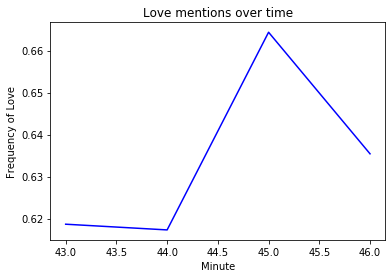

In [11]:
# Finding the frequency of love got mentioned by minute
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_time_df = tweets_df.set_index('created_at')
%matplotlib inline

tweets_time_df['love'] = check_word_in_tweet(tweets_time_df, 'love')
mean_love = tweets_time_df['love'].resample('T').mean()

plt.plot(mean_love.index.minute, mean_love, color='blue')
plt.xlabel('Minute');plt.ylabel('Frequency of Love')
plt.title('Love mentions over time')

In [12]:
# Finding the top 10 mentioned screen names and hashtags
# Extracting the text of all the tweets from the tweet object
texts = [tweet['text'] for tweet in tweets_earth]

# # Extracting screen names of users tweeting about #WeLoveTheEarth
names = [user_mentions['screen_name'] for tweet in tweets_earth for user_mentions in tweet['entities']['user_mentions']]

# # Extracting all the hashtags being used when talking about this topic
hashtags = [hashtag['text'] for tweet in tweets_earth for hashtag in tweet['entities']['hashtags']]

# Counting occcurrences/ getting frequency dist of all names and hashtags
for item in [names, hashtags]:
    c = Counter(item)
    # Inspecting the 10 most common items in c
    print (c.most_common(10), "\n")

[('lildickytweets', 102), ('LeoDiCaprio', 44), ('ShawnMendes', 33), ('halsey', 31), ('ArianaGrande', 30), ('justinbieber', 29), ('Spotify', 26), ('edsheeran', 26), ('sanbenito', 25), ('SnoopDogg', 25)] 

[('WeLoveTheEarth', 313), ('4future', 12), ('19aprile', 12), ('EARTH', 11), ('fridaysforfuture', 10), ('EarthMusicVideo', 3), ('ConCalmaRemix', 3), ('Earth', 3), ('aliens', 2), ('AvengersEndgame', 2)] 



In [13]:
# Extracting useful information from retweets
retweets = [ (tweet['retweet_count'], 
              tweet['retweeted_status']['favorite_count'],
              tweet['retweeted_status']['user']['followers_count'],
              tweet['retweeted_status']['user']['screen_name'],
              tweet['text'])
            
            for tweet in tweets_earth 
                if 'retweeted_status' in tweet
           ]

# Create a DataFrame and visualize the data in a pretty and insightful format
df = pd.DataFrame(retweets, columns=['Retweets','Favorites', 'Followers', 'ScreenName', 'Text'])

df = df.groupby(['ScreenName','Text','Followers']).sum()

df = df.sort_values(by=['Followers'], ascending=False)

df.head().style.background_gradient()

(array([303., 107.,  22.,  14.,  36.,  32.,   3.,   2.,   1.,   2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

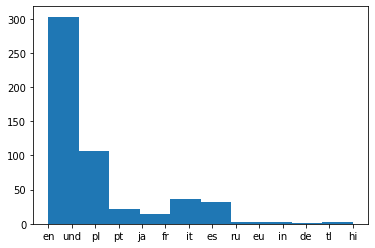

In [14]:
# Extracting language for each tweet and appending it to the list of languages
tweets_languages = []
for tweet in tweets_earth: 
    tweets_languages.append(tweet['lang'])

# Plotting the distribution of languages
%matplotlib inline
plt.hist(tweets_languages)